# importing dependencies

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

> Setting Data_Frame to Pandas, Loading files, and setting the data X and Y

In [6]:
df = pd.read_csv("./csv_file/Traffic_dataset_rand.csv")
X = df['Lane1#'].values
Y = df['greeentime1_new']
x_train, x_test ,y_train, y_test =train_test_split(X,Y, train_size=0.80,test_size=0.20,random_state=100)


## Creating th Training Model +fitting it with data

In [7]:
model = LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

In [8]:
model.coef_,model.intercept_  # finding coeficeint and intercipt pointwith y axis to draw the Red Regression Line

(array([119.85339545]), 0.03111215390878641)

In [9]:
y_predict= model.predict(x_test.reshape(-1,1)) #.astype(int) #astype used again ref link is up
y_predict

array([35.11015474,  9.39465867, 29.6245431 , 31.62882554, 17.57063339,
       24.21206036, 13.15374668, 20.0066781 , 44.97613545, 13.67296202,
       20.36338458, 42.39308815, 41.27099022,  9.25060412, 25.45455966,
       17.46433326, 14.55879643, 48.45672647, 18.88445528, 25.51175526,
       23.35828302, 34.005303  , 16.01156484, 43.22152489, 34.27493946,
       38.3841987 , 47.28100841, 17.72758668, 33.3923665 , 22.62642439,
       31.99201765, 23.18460898, 54.96391836, 46.93026692, 44.82480543,
       19.31786542, 78.79191486, 35.98713079, 13.65081623,  4.3115906 ,
        8.52465989, 20.87518087, 53.45973428, 51.07978059, 51.21849975,
        2.59939915, 18.24882826, 38.72394065, 45.57540242, 29.48660766,
        9.3300825 , 34.47999232, 16.78481256,  6.3391856 , 42.33231049,
       20.82200731, 22.28959991, 18.22314536, 12.28884575, 48.24799543,
       54.39760076,  8.4913518 , 87.1972179 , 60.71637568, 15.74959025,
        2.55434158, 44.42125857, 29.99446102, 25.58808617, 13.54

In [10]:
train_accuracy= model.score(x_train.reshape(-1,1),y_train)
train_accuracy

0.9992752393275098

In [11]:
test_accuracy= model.score(x_test.reshape(-1,1),y_test)
test_accuracy

0.9991355391659436

In [12]:
t1=0.25
t2=0.20
t3=0.25
new_tested_data=np.array([t1,t2,t3]).reshape(-1,1)
yit=model.predict(new_tested_data)
t4=np.array([abs(1-t1-t2-t3)]).reshape(-1,1)

In [13]:
# yit=model.predict(new_tested_data[0])
# yit

In [14]:
if yit[0]<7:
    yit[0]=7
elif yit[0]>120:
    yit[0]=120
useit=np.ceil(yit[0])
useit

30.0

# Save Model To a File Using Python Pickle

In [15]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

# Load Saved Model

In [16]:
import pickle
with open('model_pickle','rb') as file:
    mp = pickle.load(file) #mp => model pickle

In [17]:
mp.coef_

array([119.85339545])

# Save Model To a File Using sklearn joblib

In [18]:
import joblib
# from sklearn import joblib
joblib.dump(model, 'model_new2joblib')

['model_new2joblib']

# Load Saved Model from joblib

In [19]:
# import joblib
# mj = joblib.load('./model_joblib')
# mj.coef_


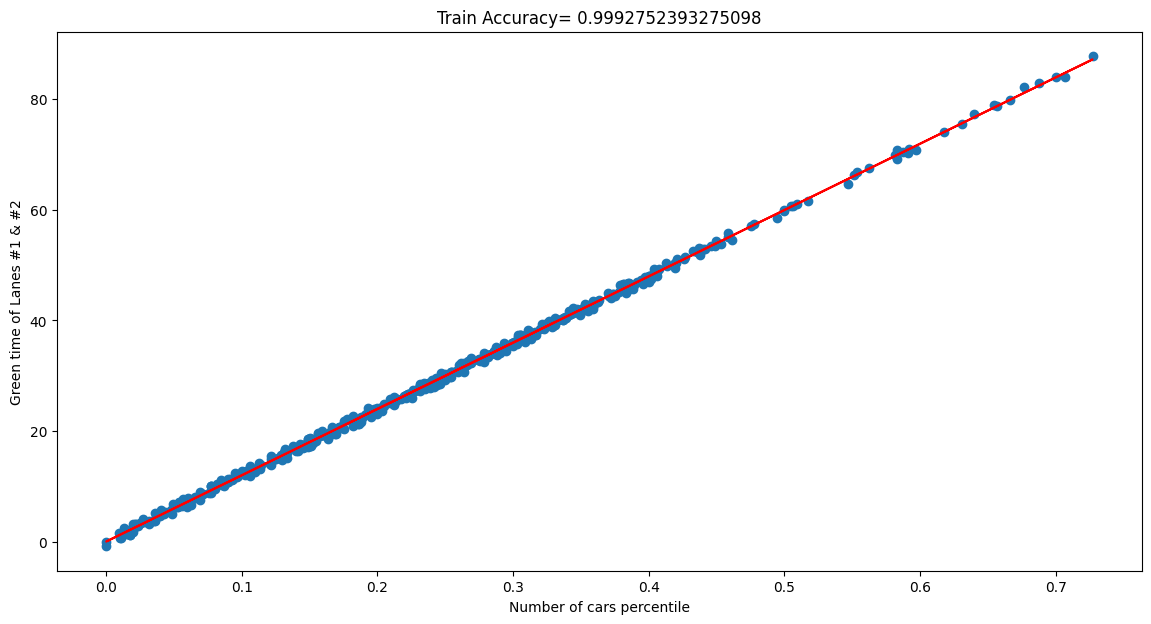

In [20]:
%matplotlib inline
plt.figure(figsize=(14,7))
plt.scatter(X,Y)
plt.xlabel("Number of cars percentile")
plt.ylabel("Green time of Lanes #1 & #2")
plt.title(f"Train Accuracy= {train_accuracy}"  )
m, b = np.polyfit(X,Y, 1)


plt.plot(X, m*X + b,'Red')